## Import Required Libraries

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Exploratory Data Analysis(EDA)</b></h3>
</div>

In [24]:
#import DataFrame
df = pd.read_csv('/content/drive/MyDrive/Projects/SMS Spam Detection /spam.csv')
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [25]:
#Rename Columns
df=df.rename(columns={"v1":"label","v2":"text"})
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
#Total No of Spam and Not Spam Category
df['label'].value_counts()

,count
label,
ham,4825
spam,747


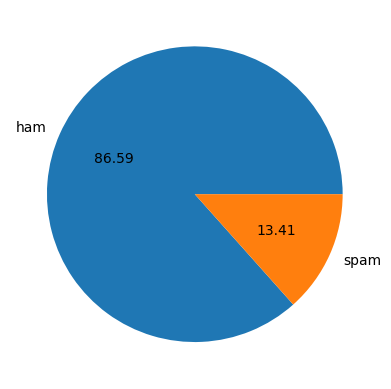

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

### **Conclusion**
  - As seen Data is Imbalance here first we process with imbalace data

In [28]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
#shape of df
df.shape

(5572, 2)

In [30]:
#Check for Null Values
df.isnull().sum()

,0
label,0
text,0


In [31]:
df['label'].value_counts()/df.shape[0]*100

,count
label,
ham,86.593683
spam,13.406317


## 1.1 Feature Engineering

* We Create Seperate features to extarct Some Information
1. Total **No of Characters**
2. Total **No of Words**
3. Total **No of Sentences**

In [32]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
#1. Total No of Char
df['num_char']=df['text'].apply(len)

In [34]:
#2. Total No of Words
df['num_words']=df['text'].apply(lambda x: len(str(x).split()))

In [35]:
#3. Total No of Sentences
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


In [37]:
#Statistical Info about dataset
df.describe()

,num_char,num_words,num_sen
count,5572.000000,5572.000000,5572.000000
mean,80.118808,15.494436,1.996411
std,59.690841,11.329427,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,61.000000,12.000000,1.500000
75%,121.000000,23.000000,2.000000
max,910.000000,171.000000,38.000000


In [38]:
df[df['label']=='ham'].describe()

,num_char,num_words,num_sen
count,4825.000000,4825.000000,4825.000000
mean,71.023627,14.200622,1.837720
std,58.016023,11.424511,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,92.000000,19.000000,2.000000
max,910.000000,171.000000,38.000000


In [39]:
df[df['label']=='spam'].describe()

,num_char,num_words,num_sen
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,3.021419
std,29.183082,5.811898,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


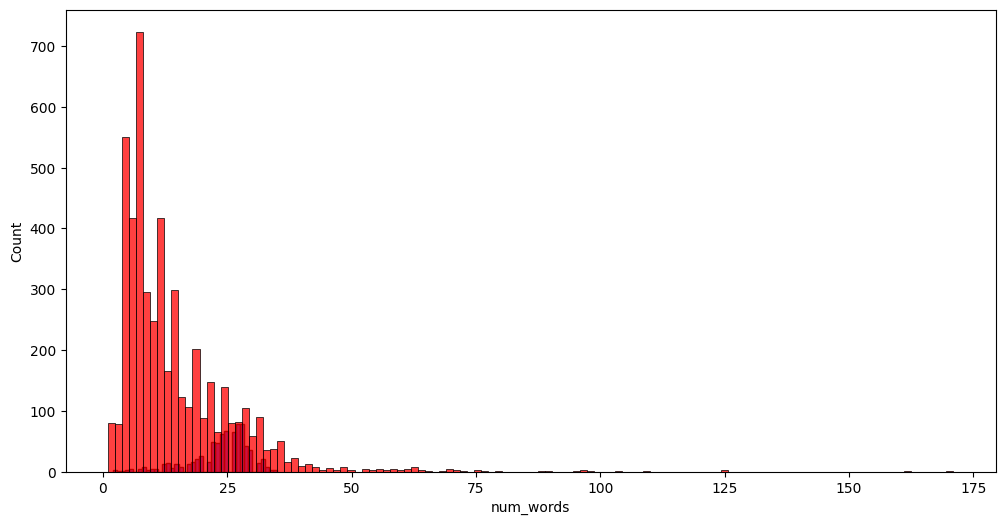

In [40]:
#Hist Plot for Spam and Not Spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=='spam']['num_words'],color='blue',bins=40)
sns.histplot(df[df['label']=='ham']['num_words'],color='red')
plt.show()

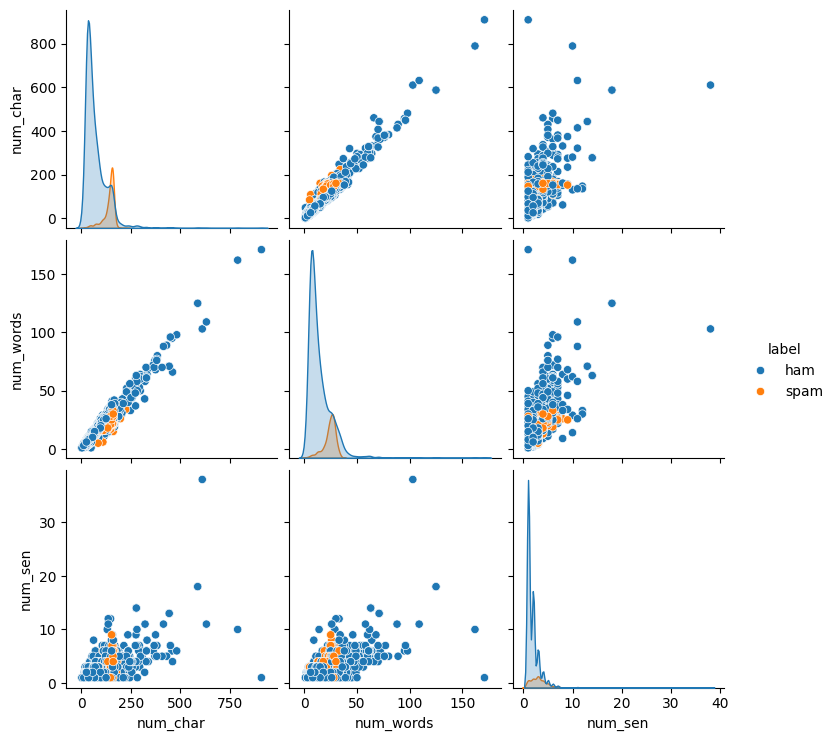

In [41]:
sns.pairplot(df,hue='label')
plt.show()

## 1.2 Handle Outliers

In [42]:
#Remove few Outliers present in dataset
i=df[df['num_char']>500].index
df.drop(i,axis=0,inplace=True)

In [43]:
df=df.reset_index()
df.drop("index",inplace=True,axis=1)

In [44]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5561,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5562,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5563,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5564,ham,The guy did some bitching but I acted like i'd...,125,26,1


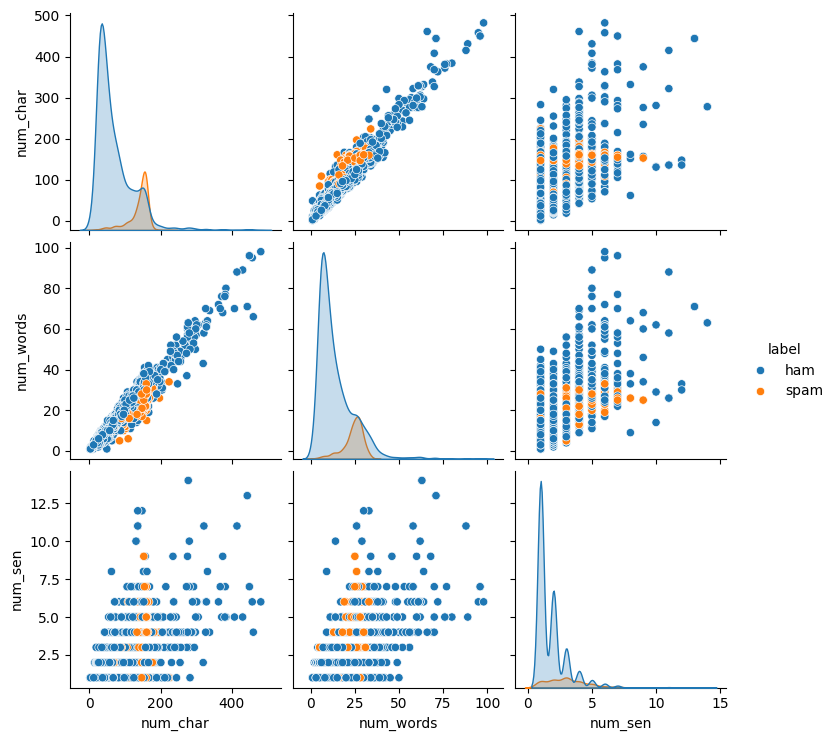

In [45]:
sns.pairplot(df,hue='label')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Preprocessing</b></h3>
</div>

In [47]:
#Import lib required for text processing
import nltk  # Ensure nltk is imported
nltk.download('stopwords')  # Download the stopwords dataset
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
#Import lib required for text processing
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time

In [49]:
#punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
#Stopwards
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Clean or Handle Text Data
1. Remove **Web Links**
2. Remove **Numbers**
3. Remove **Emails**

In [51]:
 def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

In [52]:
#Call Function
df['text'] = df['text'].apply(remove_website_links)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_emails)

### **Create Common function to Clean or process Text Data**
1. **Lower casing** to avoids duplicates
2. **Tokenization** sentences
3. Remove **Specials characters**
4. Remove **Stopwords**
5. Remove **punctuation**
6. **Stemming**

In [53]:
def transform_text(text):
    #1.lower casing
    text=text.lower()

    #2.tokenization
    lst=nltk.word_tokenize(text)


    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)

    #4.stemming
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))

    return " ".join(l2).strip()
    l1.clear()
    l2.clear()

In [54]:
#call function
df['text'] = df['text'].apply(transform_text)
df['num_words_transform']=df['text'].apply(lambda x: len(str(x).split()))

In [55]:
df

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7
...,...,...,...,...,...,...
5561,spam,2nd time tri 2 contact u pound prize 2 claim e...,161,30,4,17
5562,ham,b go esplanad fr home,37,8,1,5
5563,ham,piti mood suggest,57,10,2,3
5564,ham,guy bitch act like interest buy someth els nex...,125,26,1,13


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Visualization</b></h3>
</div>

### Most common words used for Spam Text

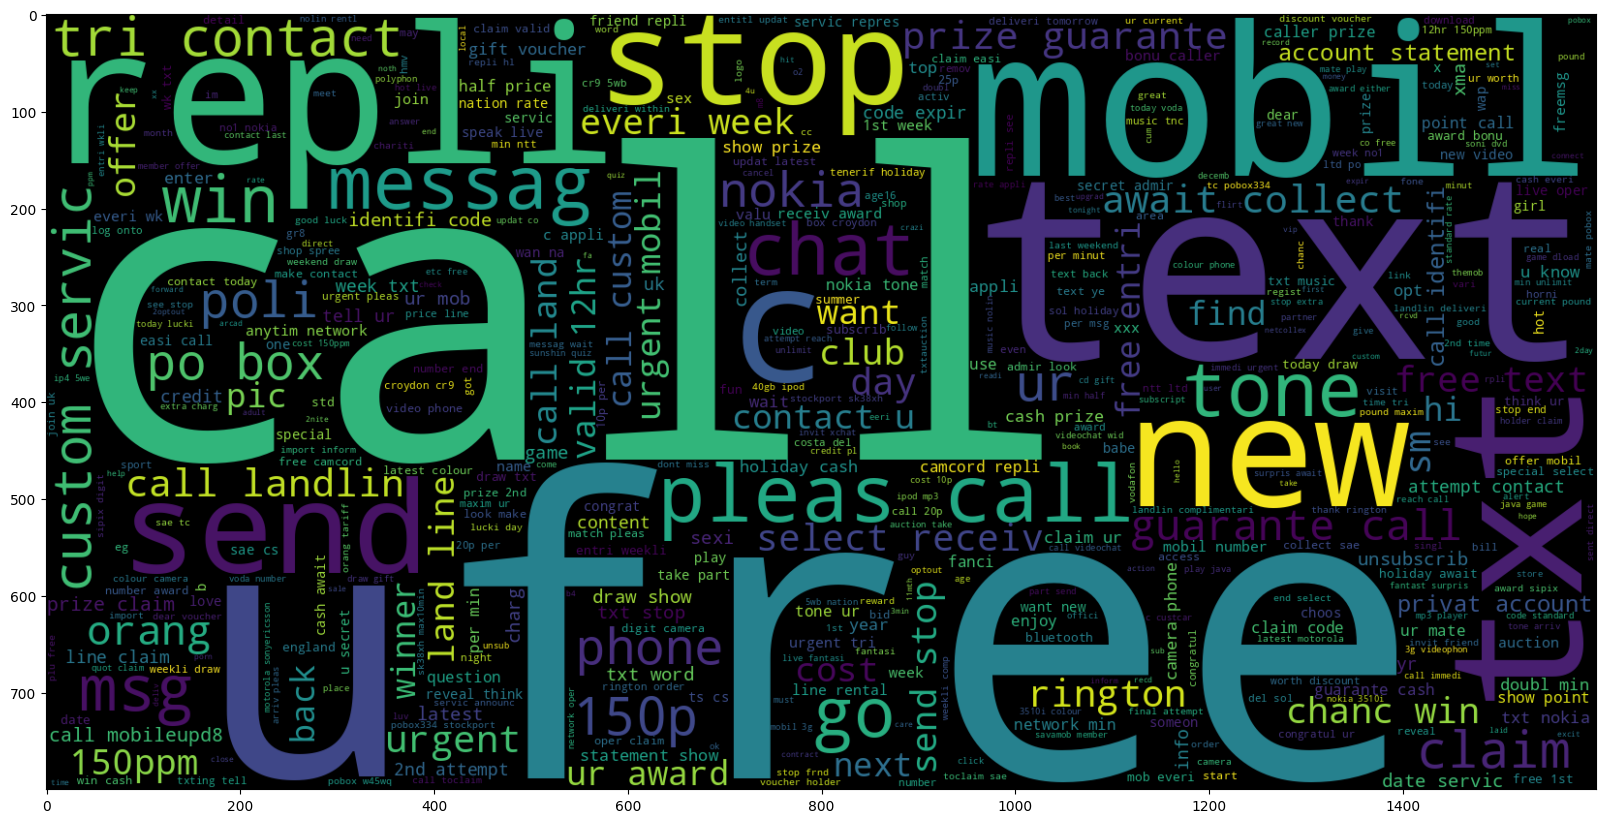

In [56]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(df[df.label == 'spam'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Most common words used for Not spam Text or Ham

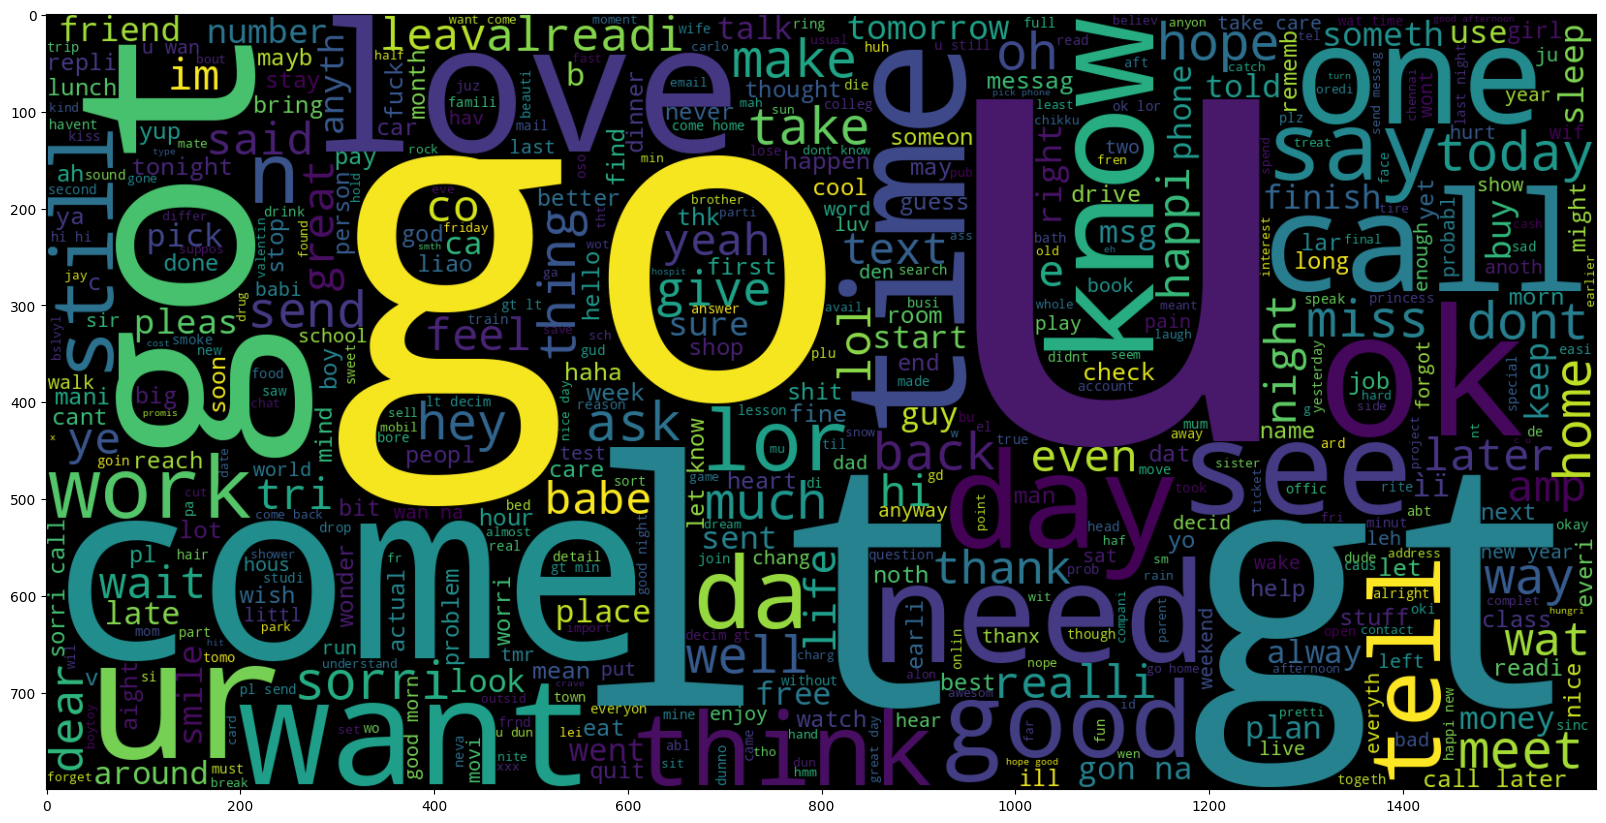

In [57]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 500).generate(" ".join(df[df.label == 'ham'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [58]:
df.head()

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7


In [59]:
df['label']=df['label'].replace({'spam':0,'ham':1})

### Not Spam Words / Ham

In [60]:
spam_corpus = []
for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

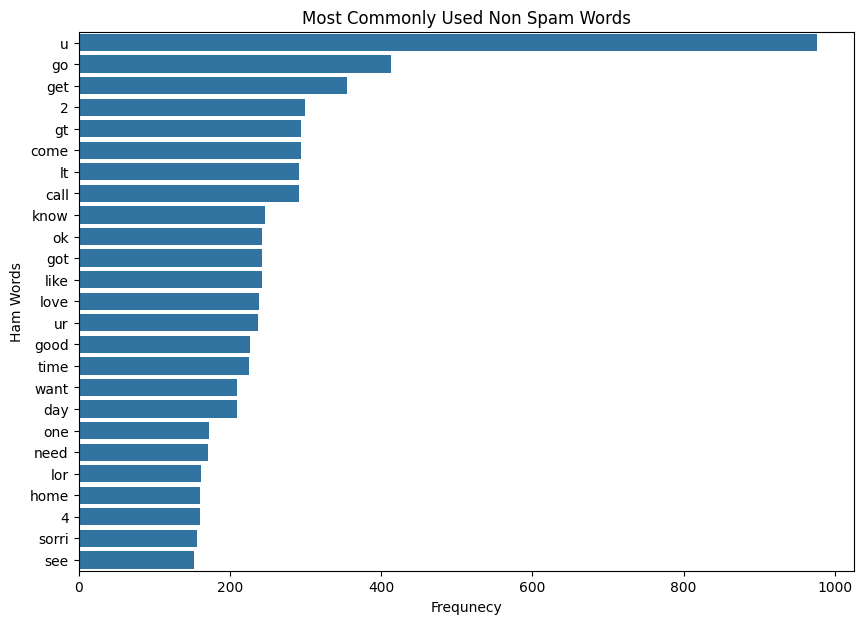

In [61]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

### Spam Words

In [62]:
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

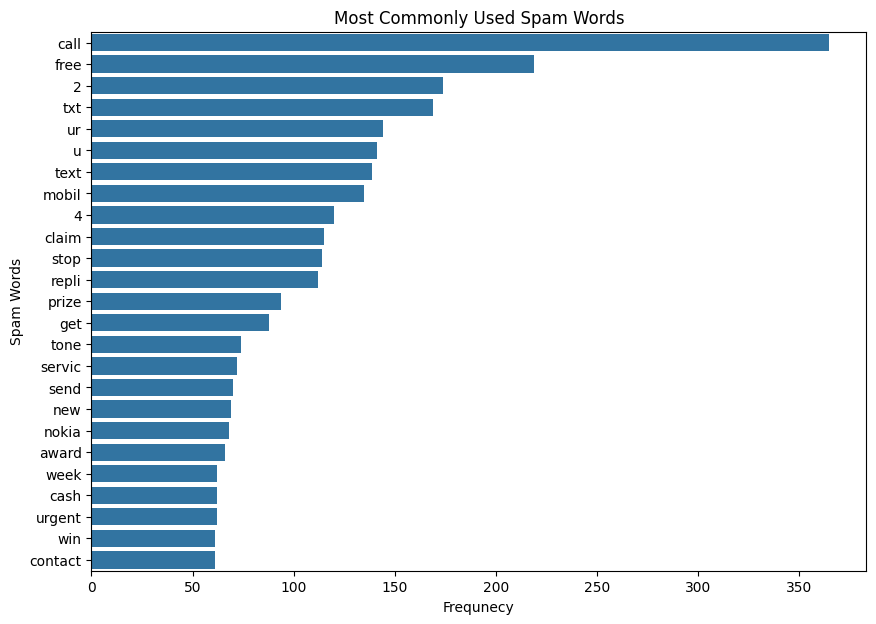

In [63]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

### Compare Total No of charactres & words in spam and non spam text  

### 1. No of Characters in Spam and Ham Text

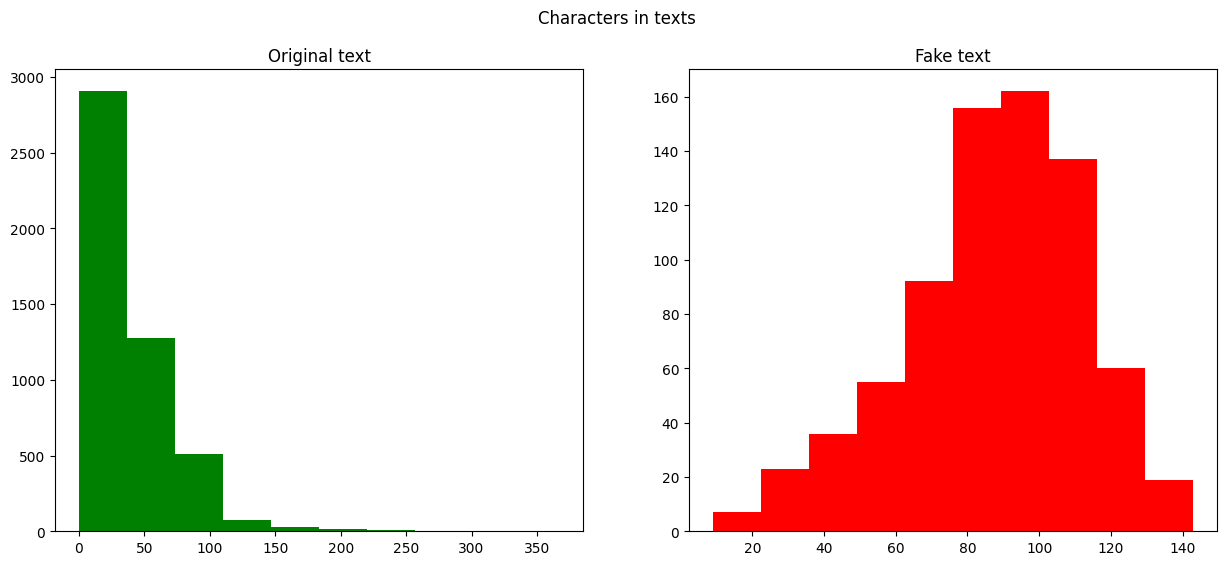

In [64]:
#Characters Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['label']==1]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['label']==0]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

### 2. No of Words in Spam and Ham Text

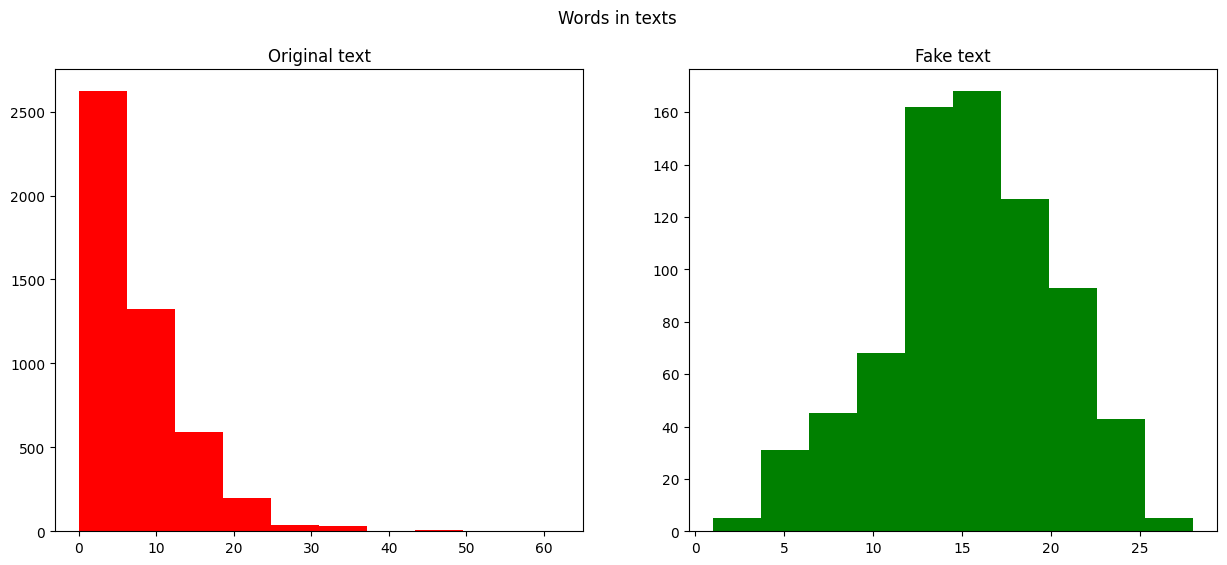

In [65]:
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['label']==1]['num_words_transform']
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['num_words_transform']
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

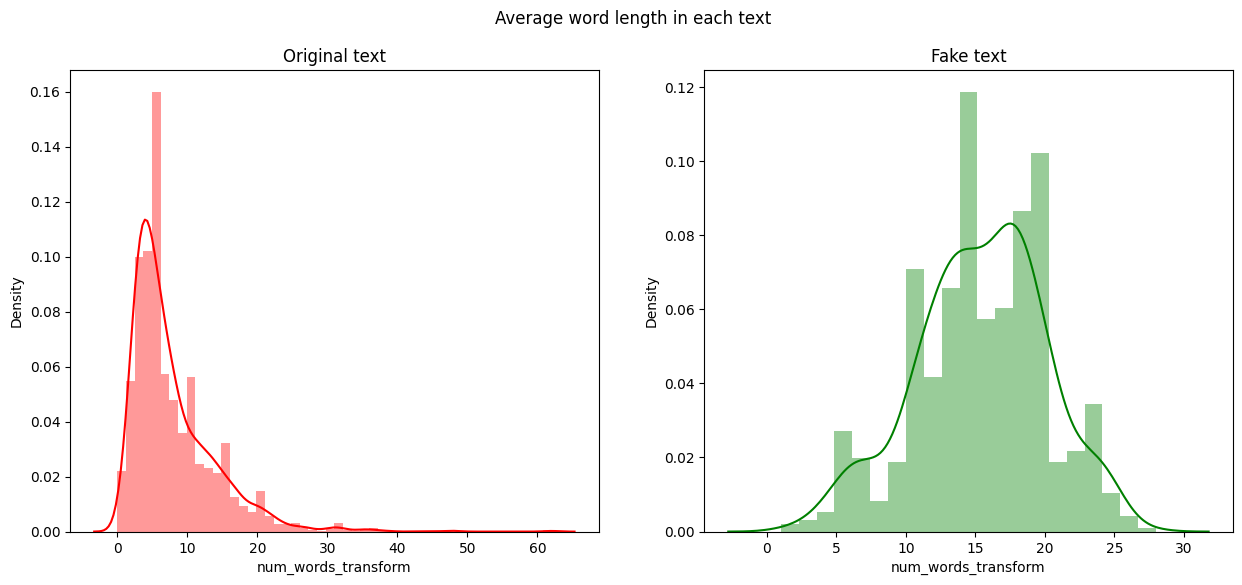

In [66]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word=df[df['label']==1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

### **Conclusion**
  - After visualize we can conclude that spam text has more words and characters as compare to Ham text
  - Average characters includes in **spam SMS** is around **90 characters**
  - Average words includes in **spam SMS** is around **15 words**

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Model Building</b></h3>
</div>

### Text Vecorization

In [67]:
#Text Vecorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

### Input Output Selection

In [68]:
#Input and Output Features
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [69]:
X.shape

(5566, 3000)

In [70]:
y.shape

(5566,)

### Train Test Split

In [71]:
pip install --upgrade scikit-learn

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Imports Libraries

In [74]:
pip install --upgrade scikit-learn


In [75]:
#Model Training
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
#Imports Lib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [77]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [78]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred1))
print("Precision Score -",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Accuracy Score - 0.8491921005385996
Precision Score - 0.9759326113116726
[[135  20]
 [148 811]]


In [79]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9793536804308797
Precision Score - 0.9775510204081632
[[133  22]
 [  1 958]]


In [80]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
            }

for i,model in classifiers.items():
    cv_score=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=5)
    print("Mean Accuracy :",i,"--",cv_score.mean().round(3))

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b> Model Evaluation</b></h3>
</div>

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    train_accuracy = clf.score(X_train, y_train)

    return accuracy, precision, recall, train_accuracy


In [82]:
svc=SVC(kernel='sigmoid', gamma=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9802513464991023,
 0.9805128205128205,
 0.9968717413972888,
 0.9849505840071878)

In [83]:
from time import time

In [84]:
import time  # Import the time module

accuracy_scores = []
precision_scores = []
recall_scores = []
train_accuracy_scores = []
processing_times = []

for name, clf in classifiers.items():
    start_time = time.time()


    current_accuracy, current_precision, current_recall, current_train_score = train_classifier(clf, X_train, y_train, X_test, y_test)

    end_time = time.time()
    processing_time = end_time - start_time
    processing_times.append(processing_time)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    print("Processing Time - {:.2f} seconds".format(processing_time))

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    train_accuracy_scores.append(current_train_score)
    print()



For  svc
Accuracy -  0.9802513464991023
Precision -  0.9805128205128205
Recall -  0.9968717413972888
Processing Time - 16.58 seconds

For  knc
Accuracy -  0.90754039497307
Precision -  0.9030131826741996
Recall -  1.0
Processing Time - 4.84 seconds

For  mnb
Accuracy -  0.9793536804308797
Precision -  0.9775510204081632
Recall -  0.9989572471324296
Processing Time - 0.11 seconds

For  dtc
Accuracy -  0.933572710951526
Precision -  0.9368213228035538
Recall -  0.9895724713242962
Processing Time - 1.08 seconds

For  lr
Accuracy -  0.9622980251346499
Precision -  0.9626639757820383
Recall -  0.9947862356621481
Processing Time - 0.17 seconds

For  rfc
Accuracy -  0.9730700179533214
Precision -  0.9725330620549338
Recall -  0.9968717413972888
Processing Time - 7.79 seconds



In [85]:
# import time

# accuracy_scores = []
# precision_scores = []
# train_accuracy_score=[]

# for name,clf in classifiers.items():
#     start_time = time.time()

#     current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
#     end_time = time.time()  # Record the end time
#     processing_time = end_time - start_time  # Calculate the processing time
#     processing_times.append(processing_time)

#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
#     print("Processing Time - {:.2f} seconds".format(processing_time))  # Print processing time


#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)
#     train_accuracy_score.append(current_train_score)
#     print()

In [86]:
df1=pd.DataFrame({'Algorithm':classifiers.keys(),'Precision':precision_scores,
                  'Test Accuracy':accuracy_scores,'Recall':recall_scores, 'Processing Time':processing_times}).round(3)

In [87]:
df2=df1.sort_values(['Precision','Test Accuracy'],ascending=False)
df2

,Algorithm,Precision,Test Accuracy,Recall,Processing Time
0,svc,0.981,0.980,0.997,16.583
2,mnb,0.978,0.979,0.999,0.113
5,rfc,0.973,0.973,0.997,7.791
4,lr,0.963,0.962,0.995,0.174
3,dtc,0.937,0.934,0.990,1.079
1,knc,0.903,0.908,1.000,4.837


## Visualize Accuracy of differents models

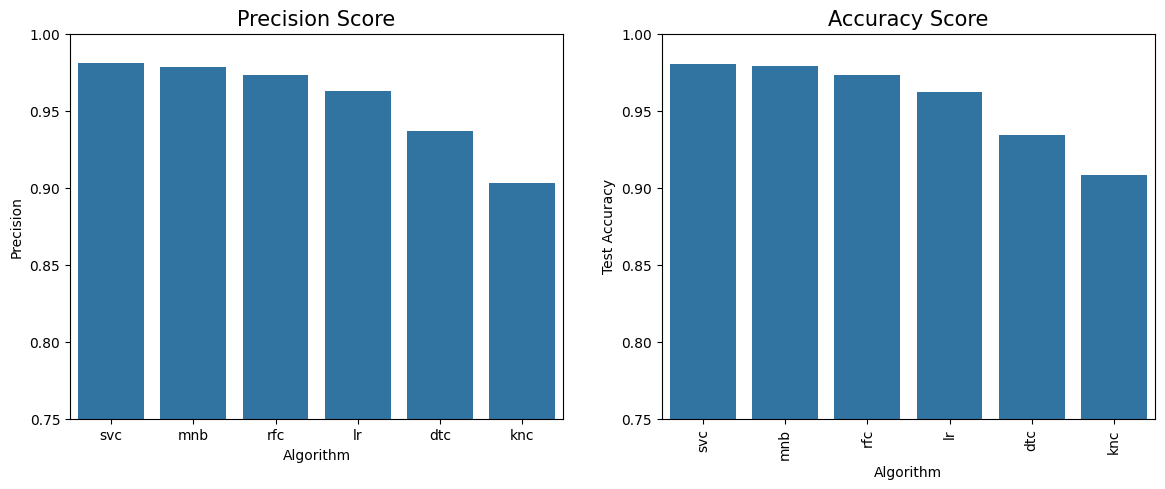

In [88]:
#Visualize accuracy of differents models
#sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x="Algorithm",y="Precision",data=df2)
plt.title("Precision Score",size=15)
plt.ylim(0.75,1.0)
plt.subplot(1,2,2)
sns.barplot(x="Algorithm",y="Test Accuracy",data=df2)
plt.ylim(0.75,1.0)
plt.title("Accuracy Score",size=15)
plt.xticks(rotation='vertical')
plt.show()